In [1]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import regularizers
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import Callback, ModelCheckpoint
import kerastuner as kt
from tensorflow import keras

C:\Users\andre\AppData\Local\Temp\ipykernel_19708\2921892510.py:10: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  import kerastuner as kt


In [62]:
train_dir = './files/TumorClassification/train'
test_dir = './files/TumorClassification/test'

In [63]:
train_datage = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

In [64]:
train_generator = train_datage.flow_from_directory(
    train_dir,
    target_size=(124, 124),
    batch_size=128,
    class_mode='categorical',
    color_mode='grayscale',
    subset = 'training'
)

Found 1050 images belonging to 3 classes.


In [65]:
validation_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(124, 124),
    batch_size=128,
    class_mode='categorical',
    color_mode='grayscale',
    subset = 'validation'
)

Found 28 images belonging to 3 classes.


In [66]:
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(124, 124),
    batch_size=128,
    class_mode='categorical',
    color_mode='grayscale',
)

Found 144 images belonging to 3 classes.


In [67]:
classes = ["BENIGN", "MALIGNANT", "NORMAL"]

In [69]:
def plotImages(img_arr):
    fig, axes = plt.subplots(1,5, figsize=(10,10))
    axes = axes.flatten()
    for img, ax in zip(img_arr, axes):
        ax.imshow(img[:,:,0])
        ax.axis('off')
    plt.tight_layout()
    plt.show()

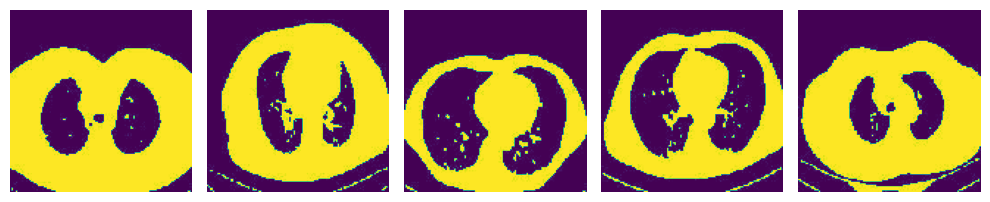

In [51]:
sample_training_images, _ = next(train_generator)
plotImages(sample_training_images[:5])

In [45]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(124, 124, 1)),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(126, activation='relu'),
    tf.keras.layers.Dense(len(classes), activation='softmax')
])

e:\Programacion\IA\CNN\tf_gpu_env\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [46]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)             │ (None, 15376)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 256)            │     3,936,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 126)            │        32,382 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 3)              │           381 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,969,275 (15.14 MB)

 Trainable params: 3,969,275 (15.14 MB)

 Non-trainable params: 0 (0.00 B)

In [47]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

hist = model.fit(train_generator, epochs=10, validation_data=validation_generator)

e:\Programacion\IA\CNN\tf_gpu_env\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 11s 420ms/step - accuracy: 0.4087 - loss: 5.0953 - val_accuracy: 0.6429 - val_loss: 2.6096
Epoch 2/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 105ms/step - accuracy: 0.5089 - loss: 1.9317 - val_accuracy: 0.6071 - val_loss: 1.5055
Epoch 3/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 111ms/step - accuracy: 0.7428 - loss: 0.6662 - val_accuracy: 0.5000 - val_loss: 1.8677
Epoch 4/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 111ms/step - accuracy: 0.8017 - loss: 0.5021 - val_accuracy: 0.6071 - val_loss: 1.8305
Epoch 5/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 117ms/step - accuracy: 0.8640 - loss: 0.3418 - val_accuracy: 0.6429 - val_loss: 1.6273
Epoch 6/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 105ms/step - accuracy: 0.9466 - loss: 0.1929 - val_accuracy: 0.6071 - val_loss: 1.8686
Epoch 7/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 108ms/step - accuracy: 0.9727 - loss: 0.1201 - val_accuracy: 0.6429 - val_loss: 1.7763
Epoch 8/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 113ms/step - accuracy: 0.9822 - loss: 0.0912 - val_accuracy: 0.6429 - val_loss

In [48]:
results = model.evaluate(test_generator)

e:\Programacion\IA\CNN\tf_gpu_env\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.5888 - loss: 2.1028 


In [70]:
def vis_result(hist, e=20):
    epochs = [i for i in range(e)]
    fig, ax = plt.subplots(1,2)
    train_acc = hist.history['accuracy']
    train_loss = hist.history['loss']
    val_acc = hist.history['val_accuracy']
    val_loss = hist.history['val_loss']
    fig.set_size_inches(16, 9)

    ax[0].plot(epochs, train_acc, 'go-', label='Training Accuracy')
    ax[0].plot(epochs, val_acc, 'ro-', label='Validation Accuracy')
    ax[0].set_title('Training & Validation Accuracy')
    ax[0].legend()
    ax[0].set_xlabel("Epochs")
    ax[0].set_ylabel("Accuracy")

    ax[1].plot(epochs, train_loss, 'g-o', label='Training Loss')
    ax[1].plot(epochs, val_loss, 'r-o', label='Validation Loss')
    ax[1].set_title('Training & Validation Loss')
    ax[1].legend()
    ax[1].set_xlabel("Epochs")
    ax[1].set_ylabel("Loss")

    plt.show()

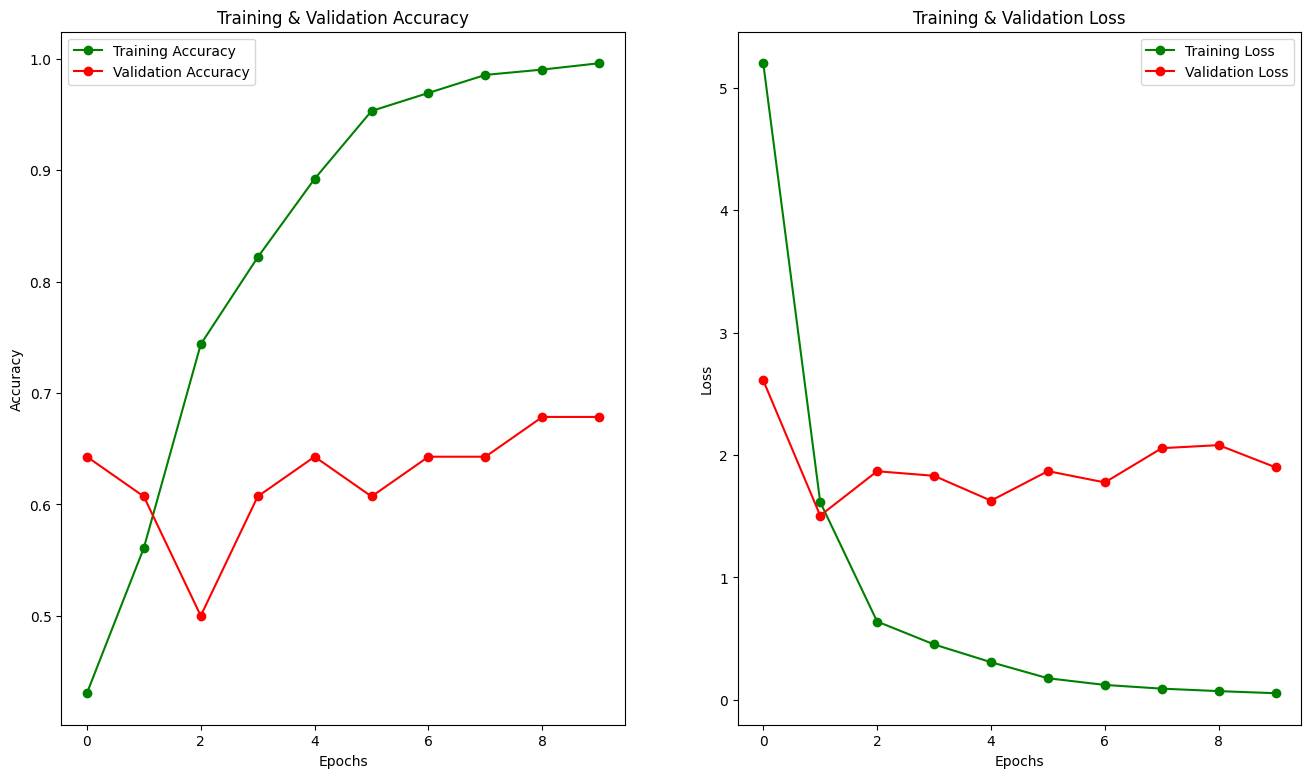

In [50]:
vis_result(hist)

In [61]:
model_opt = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(124, 124, 1)),
    tf.keras.layers.Dense(256, kernel_regularizer=regularizers.l2(1e-5), activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(126, kernel_regularizer=regularizers.l2(1e-5), activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(len(classes), activation='softmax')
])
model_opt.summary()

e:\Programacion\IA\CNN\tf_gpu_env\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_4 (Flatten)             │ (None, 15376)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 256)            │     3,936,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 126)            │        32,382 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 126)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 3)              │           381 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,969,275 (15.14 MB)

 Trainable params: 3,969,275 (15.14 MB)

 Non-trainable params: 0 (0.00 B)

In [62]:
model_opt.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [63]:
hist_opt = model_opt.fit(train_generator, epochs=20, validation_data=validation_generator)

Epoch 1/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 3s 153ms/step - accuracy: 0.3753 - loss: 5.4134 - val_accuracy: 0.6071 - val_loss: 2.7213
Epoch 2/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 135ms/step - accuracy: 0.4542 - loss: 2.6092 - val_accuracy: 0.4286 - val_loss: 1.5441
Epoch 3/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 122ms/step - accuracy: 0.5331 - loss: 1.7008 - val_accuracy: 0.6429 - val_loss: 1.0443
Epoch 4/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 123ms/step - accuracy: 0.6151 - loss: 0.9932 - val_accuracy: 0.6429 - val_loss: 1.4488
Epoch 5/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 112ms/step - accuracy: 0.7508 - loss: 0.5925 - val_accuracy: 0.6429 - val_loss: 1.2567
Epoch 6/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 116ms/step - accuracy: 0.8242 - loss: 0.4602 - val_accuracy: 0.6429 - val_loss: 1.2865
Epoch 7/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 116ms/step - accuracy: 0.8939 - loss: 0.3280 - val_accuracy: 0.6429 - val_loss: 1.1863
Epoch 8/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 112ms/step - accuracy: 0.9145 - loss: 0.2719 - val_accuracy: 0.6429 - val_loss:

In [66]:
results_opt = model_opt.evaluate(test_generator)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.5862 - loss: 2.8757


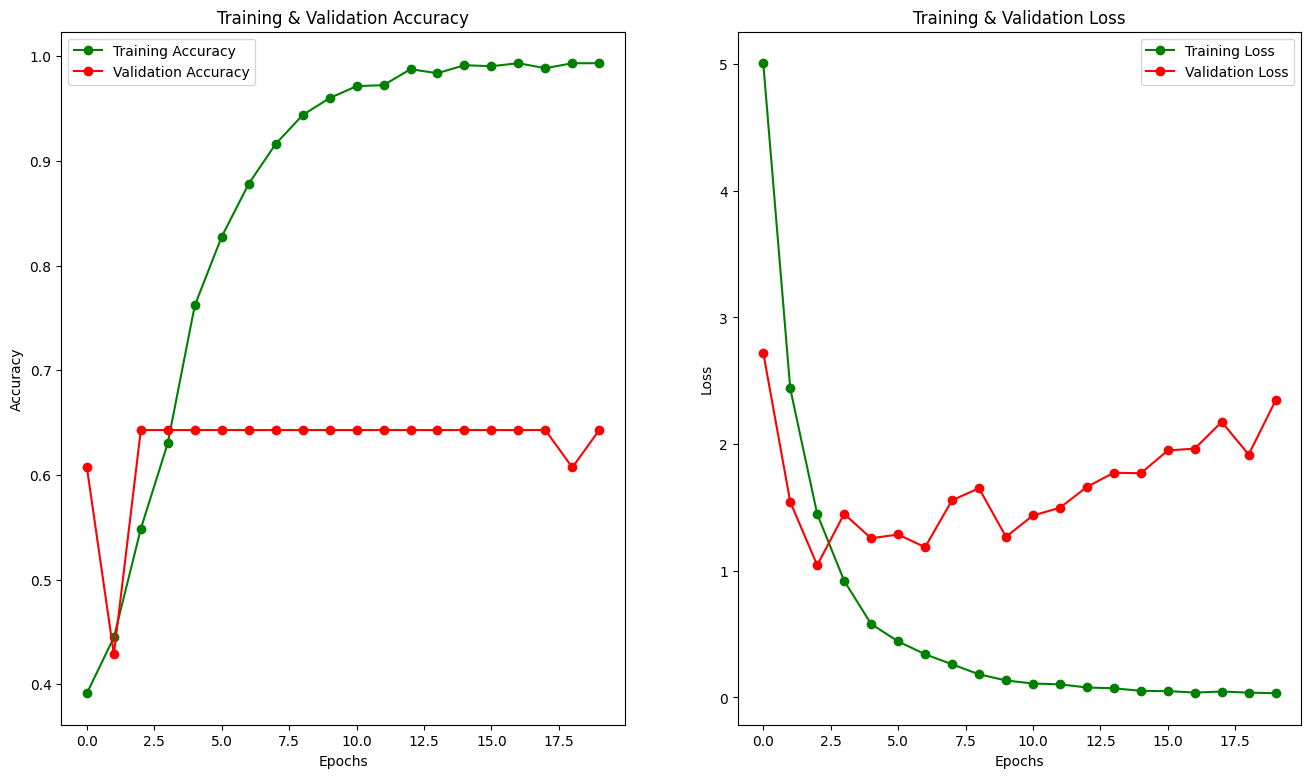

In [69]:
vis_result(hist_opt)

In [70]:
model_opt_conv = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(75, (3,3), activation='relu', input_shape=(124, 124, 1)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, kernel_regularizer=regularizers.l2(1e-5), activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(126, kernel_regularizer=regularizers.l2(1e-5), activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(len(classes), activation='softmax')
])
model_opt_conv.summary()

model_opt_conv.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
hist_opt_conv = model_opt_conv.fit(train_generator, epochs=20, validation_data=validation_generator)

e:\Programacion\IA\CNN\tf_gpu_env\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 122, 122, 75)   │           750 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 61, 61, 75)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_5 (Flatten)             │ (None, 279075)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 256)            │    71,443,456 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 126)            │        32,382 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 126)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 3)              │           381 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 71,476,969 (272.66 MB)

 Trainable params: 71,476,969 (272.66 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 19s 2s/step - accuracy: 0.3690 - loss: 4.7371 - val_accuracy: 0.6071 - val_loss: 1.6858
Epoch 2/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 15s 2s/step - accuracy: 0.5360 - loss: 1.8076 - val_accuracy: 0.5357 - val_loss: 1.6347
Epoch 3/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 15s 2s/step - accuracy: 0.7177 - loss: 0.6498 - val_accuracy: 0.6071 - val_loss: 1.6969
Epoch 4/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 15s 2s/step - accuracy: 0.9070 - loss: 0.2848 - val_accuracy: 0.5357 - val_loss: 2.1531
Epoch 5/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 15s 2s/step - accuracy: 0.9696 - loss: 0.1445 - val_accuracy: 0.6071 - val_loss: 2.8661
Epoch 6/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 15s 2s/step - accuracy: 0.9962 - loss: 0.0658 - val_accuracy: 0.6071 - val_loss: 2.5100
Epoch 7/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 16s 2s/step - accuracy: 0.9933 - loss: 0.0465 - val_accuracy: 0.6429 - val_loss: 2.6179
Epoch 8/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 16s 2s/step - accuracy: 0.9970 - loss: 0.0390 - val_accuracy: 0.6071 - val_loss: 2.5112
Epoch 9/

In [71]:
results_opt_conv = model_opt_conv.evaluate(test_generator)

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 113ms/step - accuracy: 0.6256 - loss: 2.5966


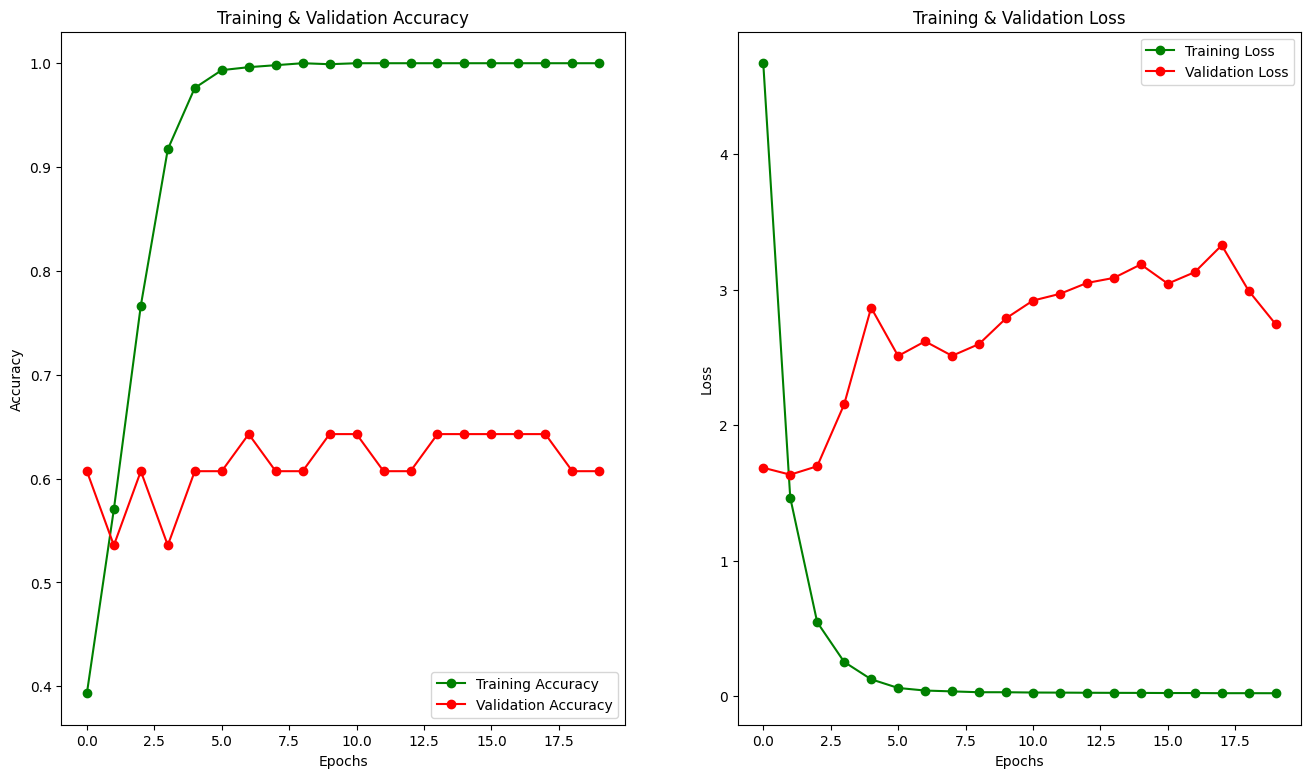

In [73]:
vis_result(hist_opt_conv)

In [36]:
def get_model():
    model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(75, (3,3), activation='relu', input_shape=(124, 124, 1)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, kernel_regularizer=regularizers.l2(1e-5), activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(126, kernel_regularizer=regularizers.l2(1e-5), activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(len(classes), activation='softmax')
    ])
    return model

model_opt_conv = get_model()
model_opt_conv.summary()

model_opt_conv.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_8 (Conv2D)               │ (None, 122, 122, 75)   │           750 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 61, 61, 75)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_8 (Flatten)             │ (None, 279075)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_24 (Dense)                │ (None, 256)            │    71,443,456 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_16 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_25 (Dense)                │ (None, 126)            │        32,382 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_17 (Dropout)            │ (None, 126)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_26 (Dense)                │ (None, 3)              │           381 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 71,476,969 (272.66 MB)

 Trainable params: 71,476,969 (272.66 MB)

 Non-trainable params: 0 (0.00 B)

In [37]:
class TrainCallback(Callback):
    def on_epoch_end(self, epoch, logs={}):
        if logs.get('accuracy') > 0.95:
            print("\nReached 95% accuracy so cancelling training!")
            self.model.stop_training = True

In [ ]:
callback = TrainCallback()

hist_opt_conv = model_opt_conv.fit(train_generator, epochs=20, validation_data=validation_generator, callbacks=[callback])

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step - accuracy: 0.6131 - loss: 1.4532


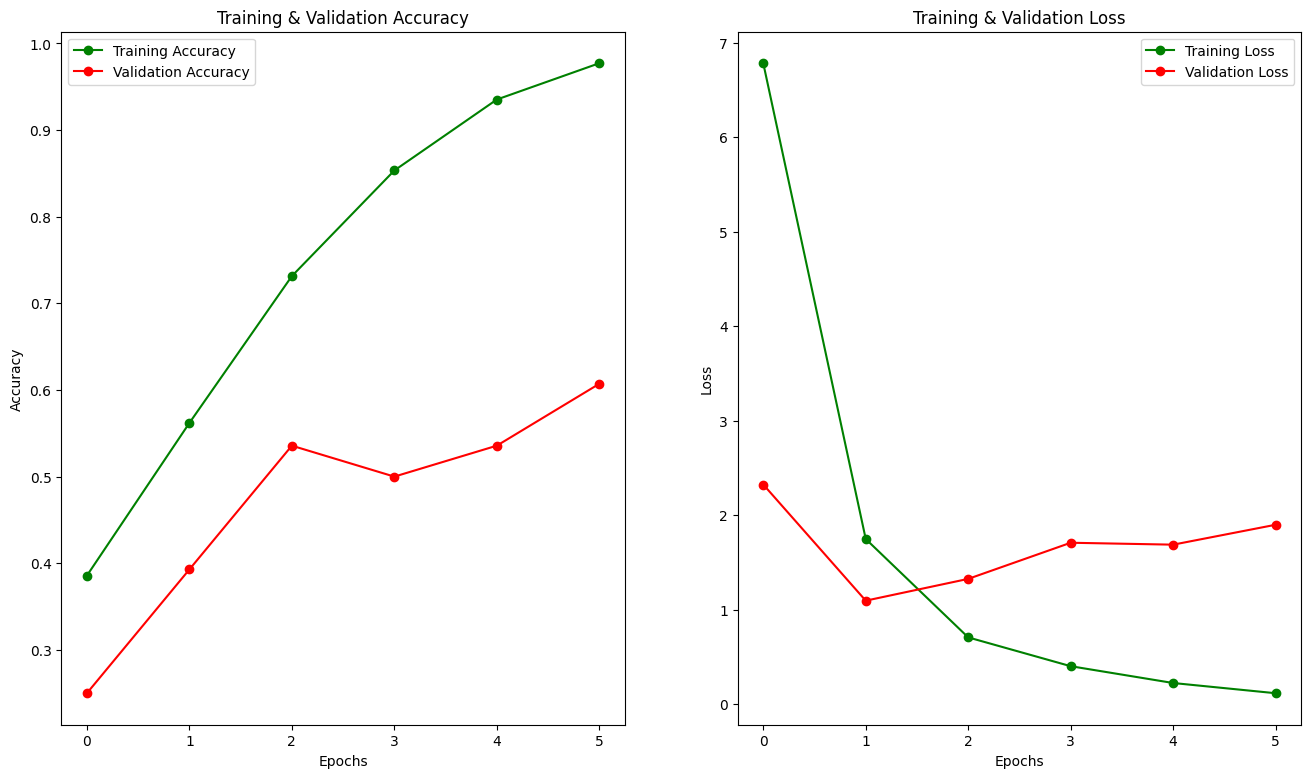

In [17]:
results_opt_conv = model_opt_conv.evaluate(test_generator)
vis_result(hist_opt_conv, e=6)

In [72]:
def construct_model(hp):
    model = tf.keras.models.Sequential()
    model.add(tf.keras.layers.Conv2D(75, (3,3), activation='relu', input_shape=(124, 124, 1)))
    model.add(tf.keras.layers.MaxPooling2D(2, 2))
    model.add(tf.keras.layers.Flatten())

    hp_units = hp.Int('unit', min_value=32, max_value=512, step=32)

    model.add(tf.keras.layers.Dense(units=hp_units, kernel_regularizer=regularizers.l2(1e-5), activation='relu'))
    model.add(tf.keras.layers.Dropout(0.2))
    model.add(tf.keras.layers.Dense(128, kernel_regularizer=regularizers.l2(1e-5), activation='relu'))
    model.add(tf.keras.layers.Dropout(0.2))
    model.add(tf.keras.layers.Dense(len(classes), activation='softmax'))

    hp_lr = hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])
    
    model.compile(optimizer=Adam(hp_lr), loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [32]:
tunner = kt.Hyperband(
    construct_model,
    objective='val_accuracy',
    max_epochs=10,
    factor=3,
    directory='models/',
    project_name='TumorClassification-tunner'
)

In [23]:
tunner.search(train_generator, epochs=10, validation_data=validation_generator)
best_hps = tunner.get_best_hyperparameters(num_trials=1)[0]

Trial 30 Complete [00h 04m 06s]
val_accuracy: 0.6785714030265808

Best val_accuracy So Far: 0.7142857313156128
Total elapsed time: 00h 46m 27s


In [28]:
print(best_hps.get('unit'))

384


In [29]:
print(best_hps.get('learning_rate'))

0.01


In [30]:
early = tf.keras.callbacks.EarlyStopping(monitor = "loss", patience=3, mode = "auto")

In [ ]:
hypermodel = tunner.hypermodel.build(best_hps)

hist_hp = hypermodel.fit(train_generator, epochs=10, validation_data=validation_generator, callbacks=[early])

In [32]:
hypermodel.evaluate(test_generator)

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 639ms/step - accuracy: 0.2841 - loss: 2.8064


[2.8068106174468994, 0.2777777910232544]

In [74]:
def get_model():
    model = tf.keras.models.Sequential()
    model.add(tf.keras.layers.Conv2D(75, (3,3), activation='relu', input_shape=(124, 124, 1))),
    model.add(tf.keras.layers.MaxPooling2D(2, 2)),
    model.add(tf.keras.layers.Flatten()),
    model.add(tf.keras.layers.Dense(512, kernel_regularizer=regularizers.l2(1e-5), activation='relu')),
    model.add(tf.keras.layers.Dropout(0.2)),
    model.add(tf.keras.layers.Dense(128, kernel_regularizer=regularizers.l2(1e-5), activation='relu')),
    model.add(tf.keras.layers.Dropout(0.2)),
    model.add(tf.keras.layers.Dense(len(classes), activation='softmax'))

    return model

hypermodel = get_model()
hypermodel.summary()

hypermodel.compile(optimizer=Adam(0.01), loss='categorical_crossentropy', metrics=['accuracy'])

Model: "sequential_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_12 (Conv2D)              │ (None, 122, 122, 75)   │           750 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_12 (MaxPooling2D) │ (None, 61, 61, 75)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_12 (Flatten)            │ (None, 279075)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_36 (Dense)                │ (None, 512)            │   142,886,912 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_24 (Dropout)            │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_37 (Dense)                │ (None, 128)            │        65,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_25 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_38 (Dense)                │ (None, 3)              │           387 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 142,953,713 (545.33 MB)

 Trainable params: 142,953,713 (545.33 MB)

 Non-trainable params: 0 (0.00 B)

In [75]:
checkpoint_path = "./models/checkpoint.weights.keras"
checkpoint = ModelCheckpoint(filepath=checkpoint_path,
                             save_freq='epoch',
                             save_weights_only = False,
                             monitor = "val_accuracy",
                             save_best_only = True,
                             verbose = 1
                             )

In [ ]:
hist_hp = hypermodel.fit(train_generator, epochs=10, validation_data=validation_generator, callbacks=[checkpoint])

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 171ms/step - accuracy: 0.6369 - loss: 4.1441


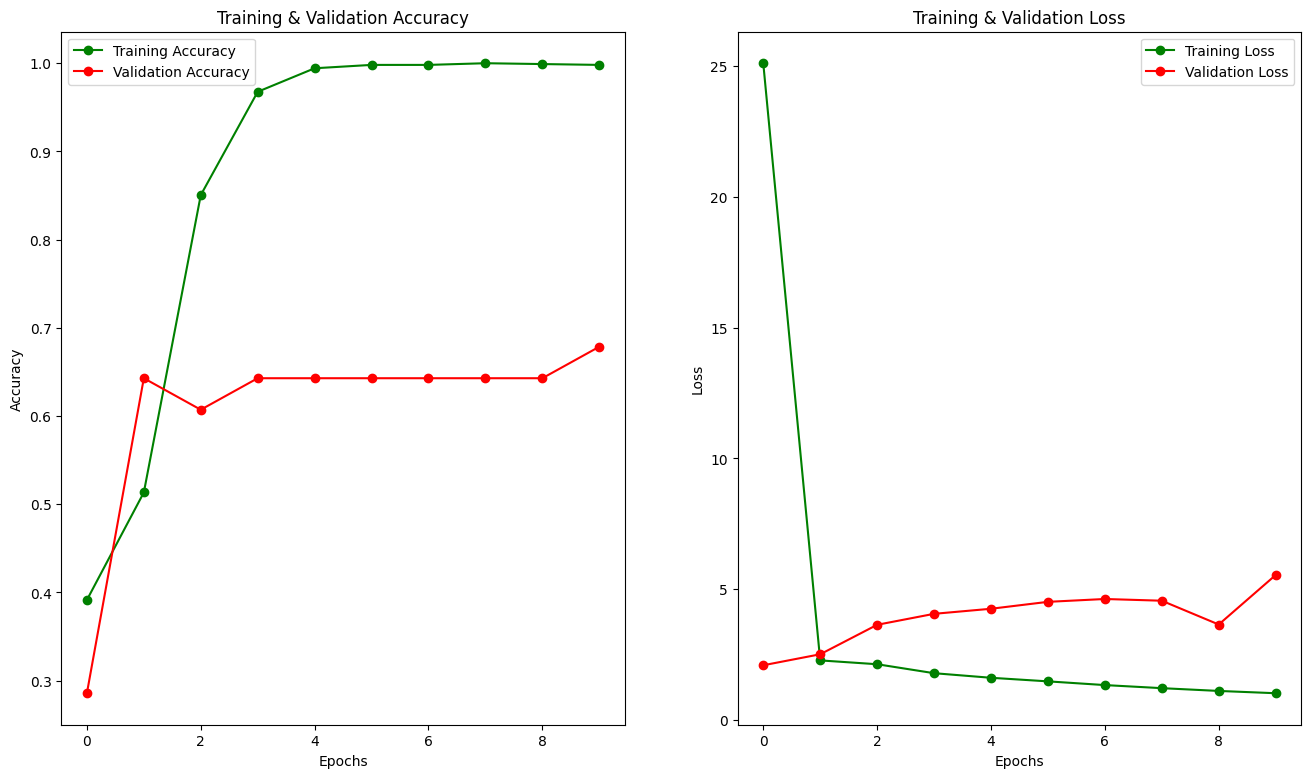

In [57]:
results_hyper = hypermodel.evaluate(test_generator)
vis_result(hist_hp, e=10)

In [19]:
hypermodel_2 = get_model()
hypermodel_2.compile(optimizer=Adam(0.01), loss='categorical_crossentropy', metrics=['accuracy'])
hypermodel_2.load_weights('./models/checkpoint.weights.h5')



e:\Programacion\IA\CNN\tf_gpu_env\Lib\site-packages\keras\src\saving\saving_lib.py:719: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 18 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [28]:
hypermodel_2.evaluate(test_generator)


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 156ms/step - accuracy: 0.6395 - loss: 4.1325


[4.127704620361328, 0.6388888955116272]